In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import linear_model , svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
reg = linear_model.LinearRegression()

In [4]:
diabetes = load_diabetes()

In [5]:
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)
X_bmi = X[['bmi']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=random.randint(0, 100))

In [7]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [8]:
reg.fit(X_train_poly,y_train)

LinearRegression()

In [9]:
y_pred_test = reg.predict(X_test_poly)
y_pred_train = reg.predict(X_train_poly)

C:\Users\USER\AppData\Local\Temp\ipykernel_16780\3032936836.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


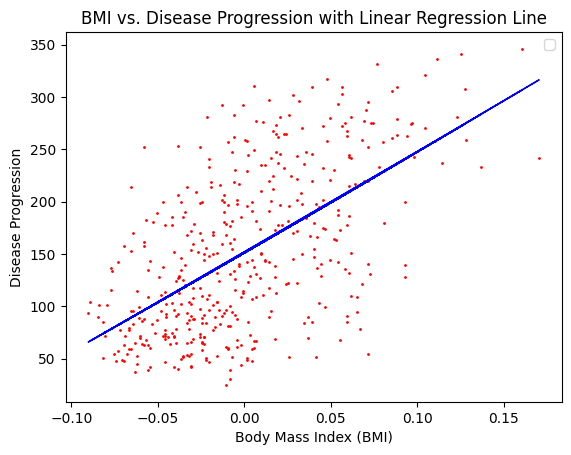

In [10]:
plt.scatter(X_bmi, y, color="red",s=1)
plt.plot(X_train, y_pred_train, color="blue", linewidth=1)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression')
plt.title('BMI vs. Disease Progression with Linear Regression Line')
plt.legend()
plt.show()